## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [6]:
# Load the country clusters data
data = pd.read_csv('HAM10000_metadata.csv')

print(data)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [7]:
df = pd.read_csv('HAM10000_metadata.csv')

# Display unique values in the 'localization' column
print(df['localization'].unique())
print(df['dx_type'].unique())

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
['histo' 'consensus' 'confocal' 'follow_up']


## Map the data

In [8]:
# Create a copy of the original dataset
data_mapped = data.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it 
data_mapped['dx_type']=data_mapped['dx_type'].map({'histo':0,'consensus':1,'confocal':2,'follow_up':3})
data_mapped['sex']=data_mapped['sex'].map({'male':0,'female':1})
data_mapped['localization'] = data_mapped['localization'].map({'scalp': 0, 'ear': 1, 'face': 2, 'back': 3, 'trunk': 4, 'chest': 5, 'upper extremity': 6, 'abdomen': 7, 'unknown': 8, 'lower extremity': 9, 'genital': 10, 'neck': 11, 'hand': 12, 'foot': 13, 'acral': 14})

# Check if we did it correctly
data_mapped

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,0,80.0,0.0,0
1,HAM_0000118,ISIC_0025030,bkl,0,80.0,0.0,0
2,HAM_0002730,ISIC_0026769,bkl,0,80.0,0.0,0
3,HAM_0002730,ISIC_0025661,bkl,0,80.0,0.0,0
4,HAM_0001466,ISIC_0031633,bkl,0,75.0,0.0,1
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,0,40.0,0.0,7
10011,HAM_0002867,ISIC_0033550,akiec,0,40.0,0.0,7
10012,HAM_0002867,ISIC_0033536,akiec,0,40.0,0.0,7
10013,HAM_0000239,ISIC_0032854,akiec,0,80.0,0.0,2


## Select the features

In [18]:

x = data_mapped.iloc[:,3:7]

x = x.dropna()
x.isnull().sum()

dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [19]:
# Check if we worked correctly
x

,dx_type,age,sex,localization
0,0,80.0,0.0,0
1,0,80.0,0.0,0
2,0,80.0,0.0,0
3,0,80.0,0.0,0
4,0,75.0,0.0,1
...,...,...,...,...
10010,0,40.0,0.0,7
10011,0,40.0,0.0,7
10012,0,40.0,0.0,7
10013,0,80.0,0.0,2


## Clustering

In [33]:

kmeans = KMeans(3)

In [34]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

C:\Users\anosh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Clustering results

In [35]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

C:\Users\anosh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 2, 0, 0])

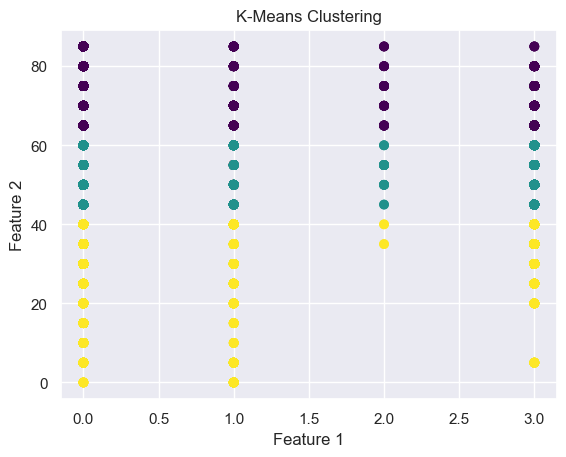

In [36]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=identified_clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [37]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy().dropna()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,lesion_id,image_id,dx,dx_type,age,sex,localization,Cluster
0,HAM_0000118,ISIC_0027419,bkl,0,80.0,0.0,0,0
1,HAM_0000118,ISIC_0025030,bkl,0,80.0,0.0,0,0
2,HAM_0002730,ISIC_0026769,bkl,0,80.0,0.0,0,0
3,HAM_0002730,ISIC_0025661,bkl,0,80.0,0.0,0,0
4,HAM_0001466,ISIC_0031633,bkl,0,75.0,0.0,1,0
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,0,40.0,0.0,7,2
10011,HAM_0002867,ISIC_0033550,akiec,0,40.0,0.0,7,2
10012,HAM_0002867,ISIC_0033536,akiec,0,40.0,0.0,7,2
10013,HAM_0000239,ISIC_0032854,akiec,0,80.0,0.0,2,0


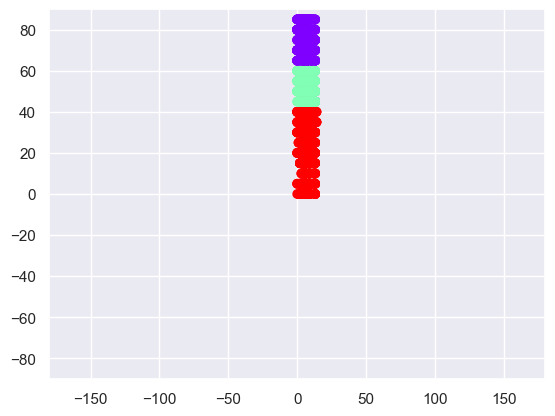

In [38]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['localization'],data_with_clusters['age'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

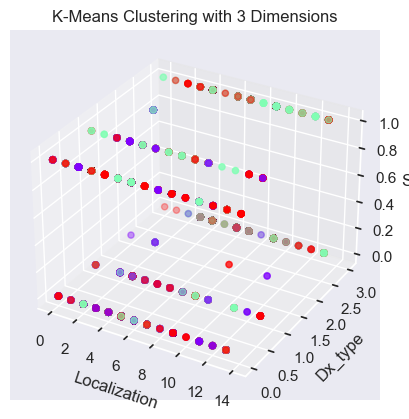

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize the 4 dimensions
ax.scatter(data_with_clusters['localization'], data_with_clusters['dx_type'], data_with_clusters['sex'], c=data_with_clusters['Cluster'], cmap='rainbow')
ax.set_xlabel('Localization')
ax.set_ylabel('Dx_type')
ax.set_zlabel('Sex')
ax.set_title('K-Means Clustering with 3 Dimensions')

plt.show()